In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [14]:
bank=pd.read_csv("Bankruptcy.csv",index_col=0)

In [15]:
x=bank.drop(['D','YR'],axis=1)
y=bank['D']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=23)

svm = SVC(kernel = 'linear',probability=True)
params = {'SVM__C':np.linspace(0.0001,10,20)}
skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

#Standard Scaler
std_scaler = StandardScaler()
pipe_std = Pipeline([('SCL',std_scaler),('SVM',svm)])
print(pipe_std.get_params())

gcv_stdsvc = GridSearchCV(pipe_std,param_grid=params,cv=skfold)
gcv_stdsvc.fit(x,y)
print("\nBest Parameters : ",gcv_stdsvc.best_params_)
print("Best Accuracy Score : ",gcv_stdsvc.best_score_)

#MinMax Scaler
mm_scaler = MinMaxScaler()
pipe_mm = Pipeline([('MM',mm_scaler),('SVM',svm)])
print(pipe_mm.get_params())

gcv_mmsvc = GridSearchCV(pipe_mm,param_grid=params,cv=skfold)
gcv_mmsvc.fit(x,y)
print("\nBest Parameters : ",gcv_mmsvc.best_params_)
print("Best Accuracy Score : ",gcv_mmsvc.best_score_)


# Both Scaler In One Search

pipe=Pipeline([('SCL',std_scaler),('SVM',svm)])
print(pipe.get_params())
params={'SVM_C':np.linspace(0.0001,10,20),'SCL':[std_scaler,mm_scaler]}
gcv=GridSearchCV(pipe,param_grid=params,cv=skfold)
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'memory': None, 'steps': [('SCL', StandardScaler()), ('SVM', SVC(kernel='linear', probability=True))], 'verbose': False, 'SCL': StandardScaler(), 'SVM': SVC(kernel='linear', probability=True), 'SCL__copy': True, 'SCL__with_mean': True, 'SCL__with_std': True, 'SVM__C': 1.0, 'SVM__break_ties': False, 'SVM__cache_size': 200, 'SVM__class_weight': None, 'SVM__coef0': 0.0, 'SVM__decision_function_shape': 'ovr', 'SVM__degree': 3, 'SVM__gamma': 'scale', 'SVM__kernel': 'linear', 'SVM__max_iter': -1, 'SVM__probability': True, 'SVM__random_state': None, 'SVM__shrinking': True, 'SVM__tol': 0.001, 'SVM__verbose': False}

Best Parameters :  {'SVM__C': 1.052721052631579}
Best Accuracy Score :  0.7948717948717949
{'memory': None, 'steps': [('MM', MinMaxScaler()), ('SVM', SVC(kernel='linear', probability=True))], 'verbose': False, 'MM': MinMaxScaler(), 'SVM': SVC(kernel='linear', probability=True), 'MM__clip': False, 'MM__copy': True, 'MM__feature_range': (0, 1), 'SVM__C': 1.0, 'SVM__break_ties': Fals

ValueError: Invalid parameter 'SVM_C' for estimator Pipeline(steps=[('SCL', StandardScaler()),
                ('SVM', SVC(kernel='linear', probability=True))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
hr=pd.read_csv("HR_comma_sep.csv")

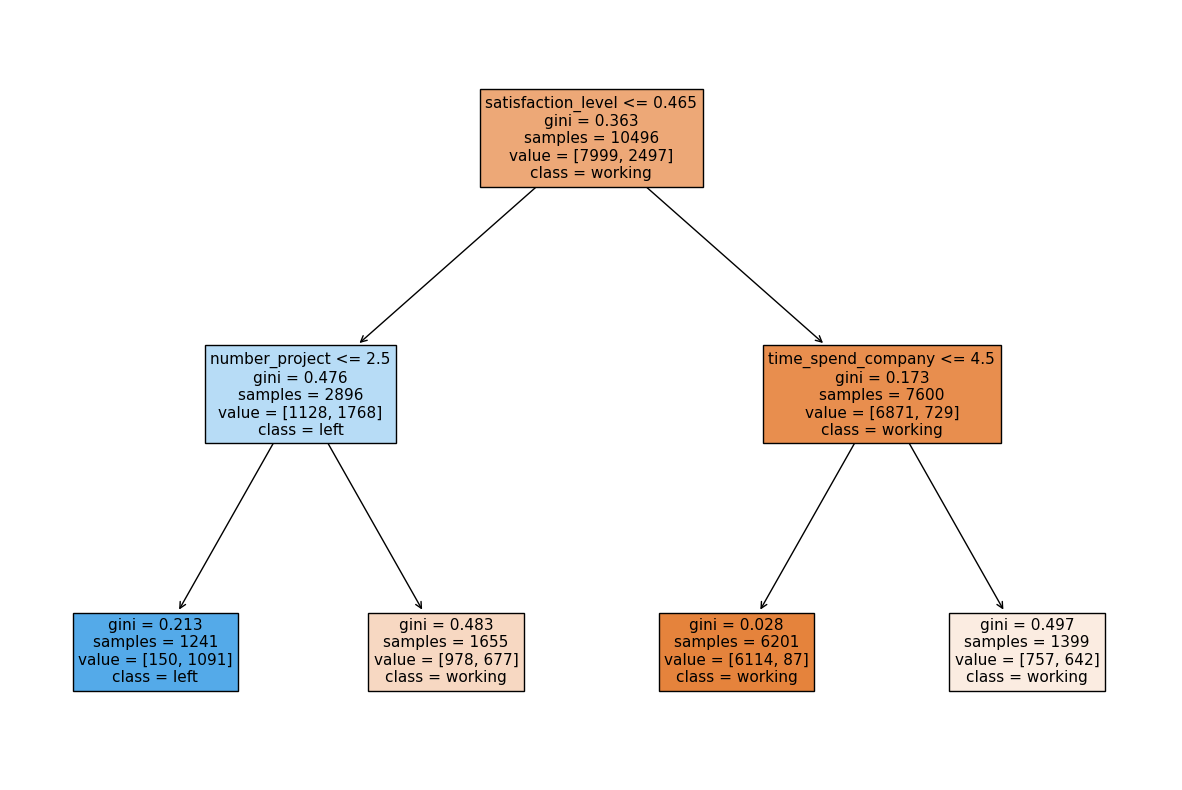

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0] [[0.98597    0.01403   ]
 [0.12087027 0.87912973]
 [0.98597    0.01403   ]
 ...
 [0.98597    0.01403   ]
 [0.98597    0.01403   ]
 [0.54110079 0.45889921]]
{'max_depth': 6}
-0.11458681615740332


In [38]:
dum_hr=pd.get_dummies(hr,drop_first=True)
x=dum_hr.drop('left',axis=1)
y=dum_hr['left']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=23)
dtc=DecisionTreeClassifier(random_state=23,max_depth=2)#max_depth is tunning parameter
dtc.fit(x_train,y_train)


plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=list(x.columns),class_names=['working','left'],filled=True,fontsize=11)
plt.show()




y_pred=dtc.predict(x_test)
y_pred_prob=dtc.predict_proba(x_test)
print(y_pred)
print(y_pred,y_pred_prob)


skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'max_depth':[3,4,5,6,7,None]}
dtc=DecisionTreeClassifier(random_state=23)
gcv=GridSearchCV(dtc,param_grid=params,cv=skfold,scoring='neg_log_loss')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

In [26]:
kyh=pd.read_csv("Kyphosis.csv")

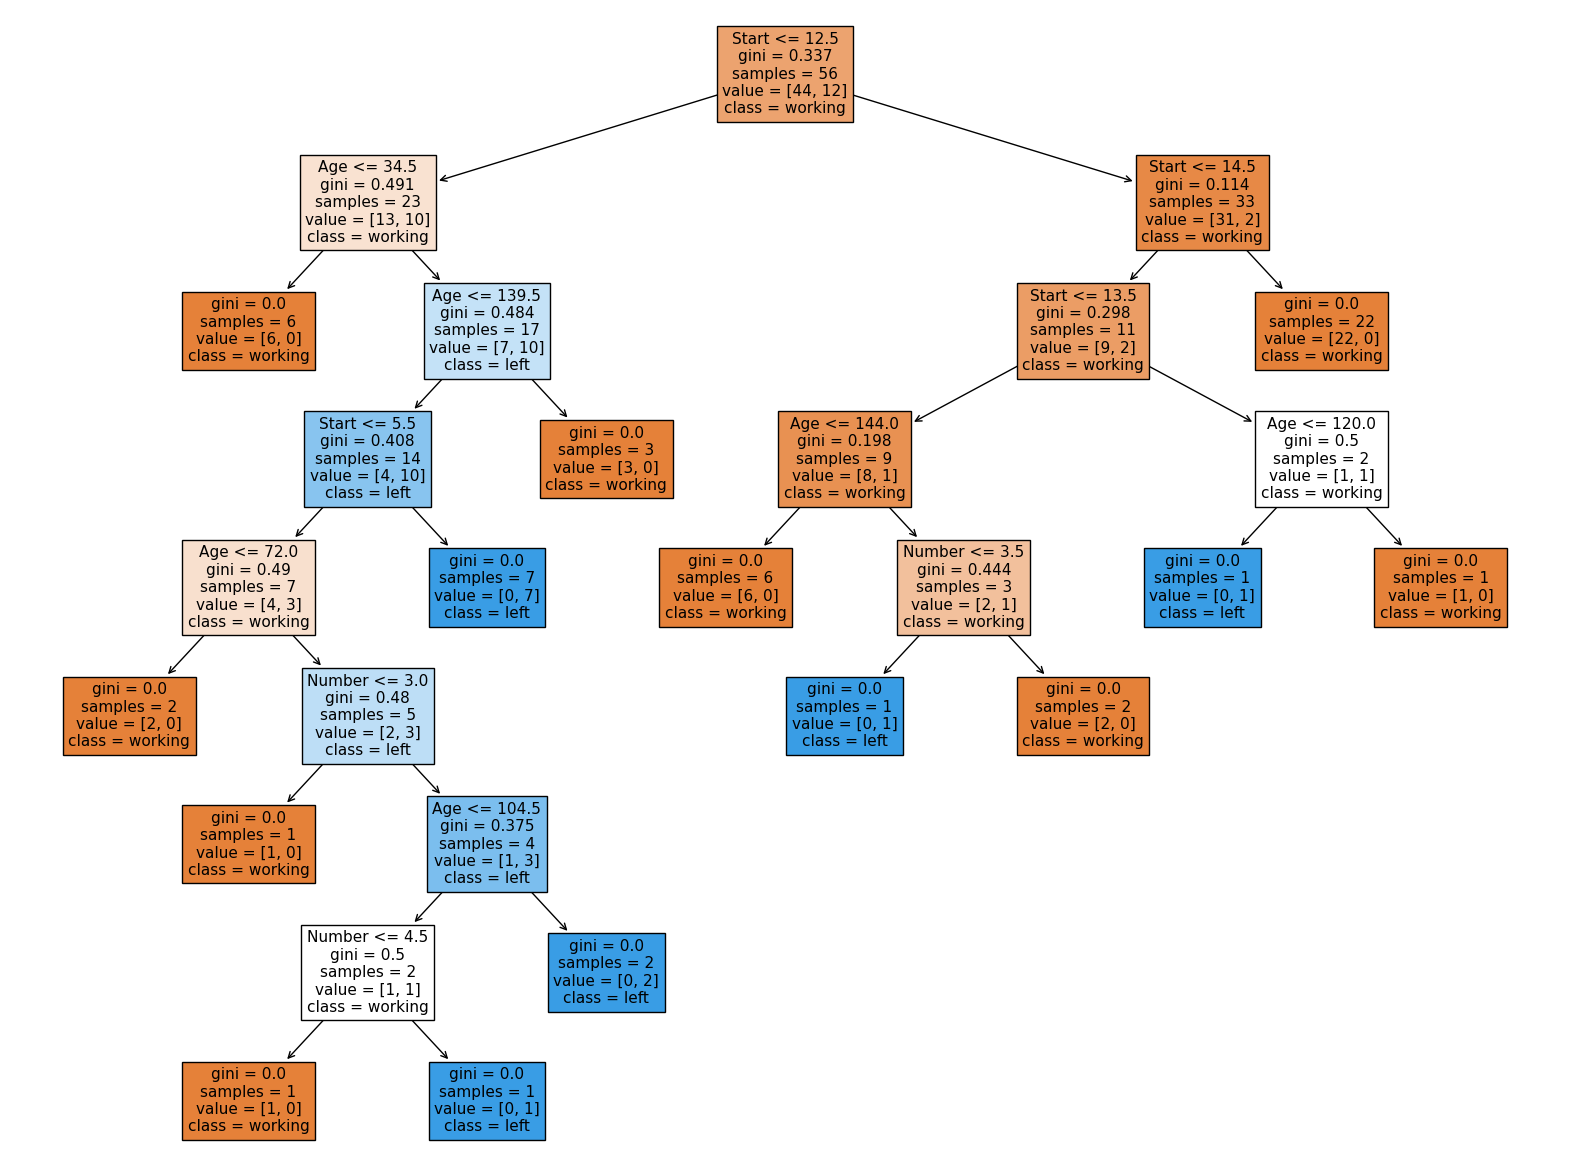

0.72
{'max_depth': 3}
0.7161764705882353


In [36]:
x=kyh.drop('Kyphosis',axis=1)
y=kyh['Kyphosis']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=23)
dtc=DecisionTreeClassifier(random_state=23)
dtc.fit(x_train,y_train)


plt.figure(figsize=(20,15))
plot_tree(dtc,feature_names=list(x.columns),class_names=['working','left'],filled=True,fontsize=11)
plt.show()


y_pred=dtc.predict(x_test)
y_pred_prob=dtc.predict_proba(x_test)
print(accuracy_score(y_test,y_pred))


params = {'min_samples_split':[2,5,20,80,100],'max_depth':[3,4,6,7,None],'min_samples_leaf':[1,5,10,20]}
dtr=DecisionTreeClassifier(random_state=23,max_depth=2)
gcv = GridSearchCV(dtr, param_grid=params,cv=kfold)# write verbose 3 when we want to details
gcv.fit(x_train,y_train)
print("For Training:",gcv.best_params_)
print("For Training:",gcv.best_score_)

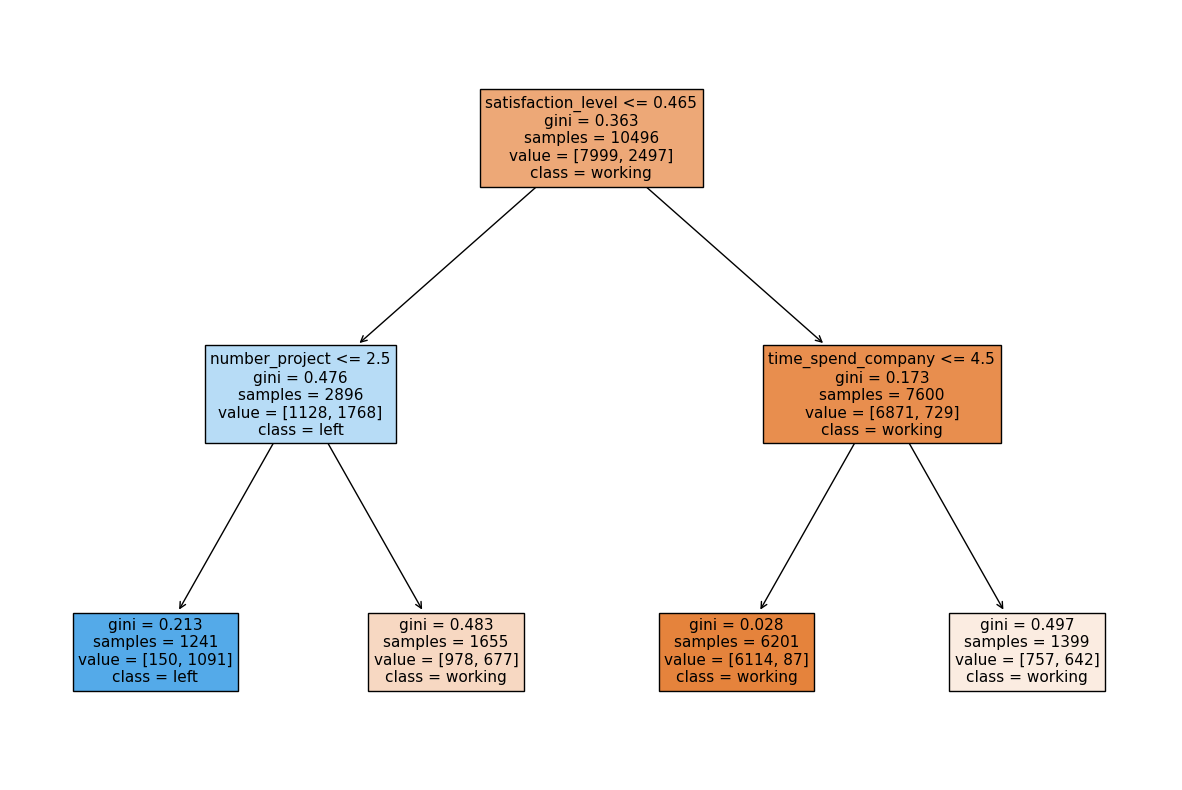

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0] [[0.98597    0.01403   ]
 [0.12087027 0.87912973]
 [0.98597    0.01403   ]
 ...
 [0.98597    0.01403   ]
 [0.98597    0.01403   ]
 [0.54110079 0.45889921]]
{'max_depth': 6, 'min_samples_leaf': 10}
-0.1104535509288519


In [40]:
# Using Max And Min 
hr=pd.read_csv("HR_comma_sep.csv")
dum_hr=pd.get_dummies(hr,drop_first=True)
x=dum_hr.drop('left',axis=1)
y=dum_hr['left']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=23)
dtc=DecisionTreeClassifier(random_state=23,max_depth=2)#max_depth is tunning parameter
dtc.fit(x_train,y_train)


plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=list(x.columns),class_names=['working','left'],filled=True,fontsize=11)
plt.show()




y_pred=dtc.predict(x_test)
y_pred_prob=dtc.predict_proba(x_test)
print(y_pred)
print(y_pred,y_pred_prob)


skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'max_depth':[3,4,5,6,7,None],'min_samples_leaf':[2,5,10,20,80,100]}
dtc=DecisionTreeClassifier(random_state=23)
gcv=GridSearchCV(dtc,param_grid=params,cv=skfold,scoring='neg_log_loss')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)